<a href="https://colab.research.google.com/github/SundharessB/machine-learing/blob/main/2348564_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
cm=pd.read_csv('/content/Churn_Modelling.csv')

In [30]:
cm.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
cm.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
cm.shape

(10000, 14)

In [10]:
cm.info()
cm.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
from sklearn.preprocessing import LabelEncoder
for col in cm.columns:
  le=LabelEncoder()
  cm[col]=le.fit_transform(cm[col])

In [10]:
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
cm = cm[['CustomerId', 'CreditScore','Geography','Gender','Age','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

In [13]:
cm.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2736,228,0,0,24,2,0,1,1,5068,1
1,3258,217,2,0,23,1,743,0,1,5639,0
2,2104,111,0,0,24,8,5793,1,0,5707,1
3,5435,308,0,0,21,1,0,0,0,4704,0
4,6899,459,2,0,25,2,3696,1,1,3925,0


In [14]:
pd.crosstab (cm['Tenure'],cm['Exited'])


Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


<Axes: xlabel='Exited', ylabel='Tenure'>

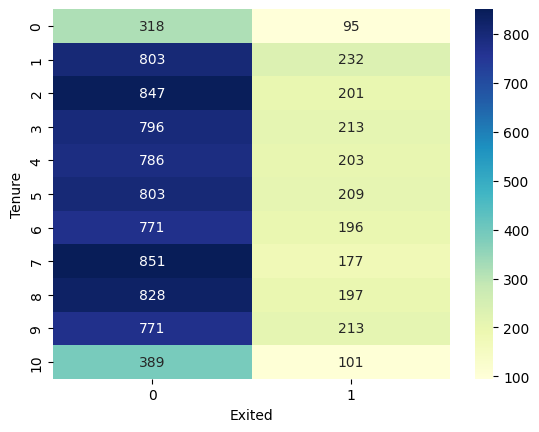

In [15]:
sns.heatmap(pd.crosstab(cm['Tenure'], cm['Exited']), annot=True, cmap="YlGnBu", fmt='d')

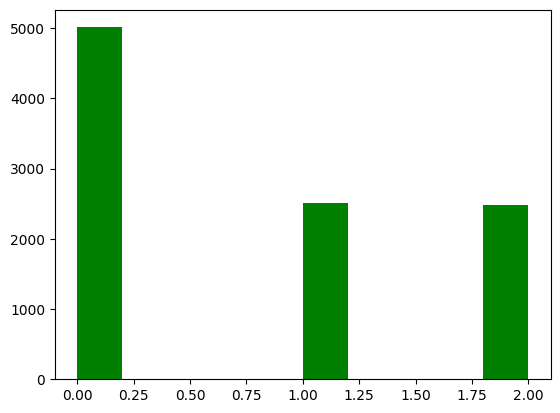

In [20]:
plt.hist(cm['Geography'], color='green');

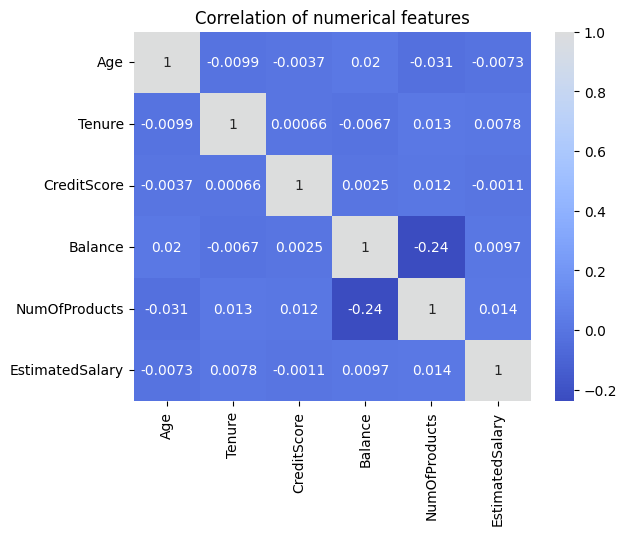

In [24]:
numerical_features = ['Age','Tenure','CreditScore','Balance','NumOfProducts','EstimatedSalary']
corr_matrix = cm[numerical_features].corr()
sns.heatmap(corr_matrix,annot=True,center=True,cmap='coolwarm')
plt.title('Correlation of numerical features')
plt.show()


In [32]:
from scipy.stats import chi2_contingency

In [33]:
cate_features = pd.crosstab(cm['Geography'], cm['Exited'])
chi2, p, dof, expected = chi2_contingency(cate_features)
print(f"P value for geographic and exited: {p}")

P value for geographic and exited: 3.8303176053541544e-66


In [35]:
cate_features = pd.crosstab(cm['Age'],cm['Exited'])
chi2,p,dof,expected = chi2_contingency(cate_features)
print(f"P value for age and exited : {p}")

P value for age and exited : 3.7790898005594087e-290


In [37]:
cate_features = pd.crosstab(cm['Gender'],cm['Exited'])
chi2,p,dof,expected = chi2_contingency(cate_features)
print(f"P value for gender and exited : {p}")

P value for gender and exited : 2.2482100097131755e-26


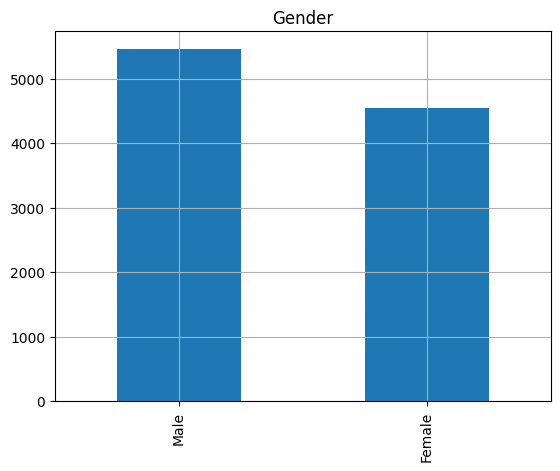

In [38]:
cm['Gender'].value_counts().plot(kind="bar",title="Gender",grid=True)
plt.show()

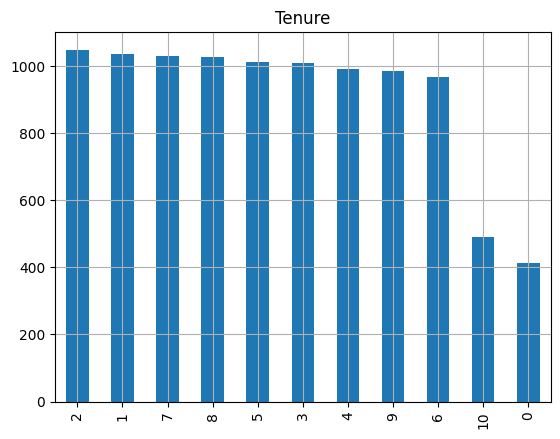

In [40]:
cm['Tenure'].value_counts().plot(kind="bar",title="Tenure",grid=True)
plt.show()